<a href="https://colab.research.google.com/github/FerValenzuela-ops/house_price_prediction/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *



     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 2.0 MB/s 
     |████████████████████████████████| 189 kB 50.5 MB/s 
     |████████████████████████████████| 1.2 MB 39.9 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 51 kB 182 kB/s 
Mounted at /content/gdrive


In [2]:
search_images_bing

<function fastbook.search_images_bing>

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '16678a4c495e411b900802164f4ad1c1')

In [6]:


results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)



150

In [7]:

ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']


In [8]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

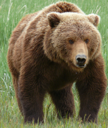

In [9]:
im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [11]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [51]:
fns = get_image_files(path)
fns

(#419) [Path('bears/a.jpg'),Path('bears/black/00000032.jpg'),Path('bears/black/00000104.jpg'),Path('bears/black/00000107.jpg'),Path('bears/black/00000147.jpg'),Path('bears/black/00000011.jpg'),Path('bears/black/00000019.jpg'),Path('bears/black/00000106.jpg'),Path('bears/black/00000056.jpg'),Path('bears/black/00000020.jpg')...]

In [52]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
failed.map(Path.unlink);

In [68]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [69]:


dls = bears.dataloaders(path)



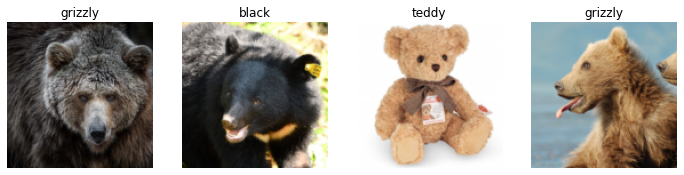

In [70]:
dls.valid.show_batch(max_n=4, nrows=1)

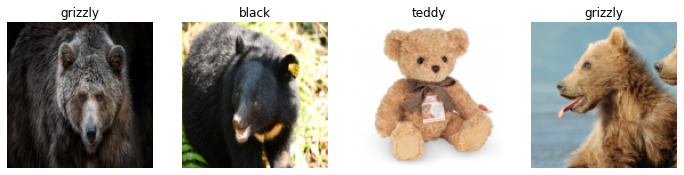

In [71]:


bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)



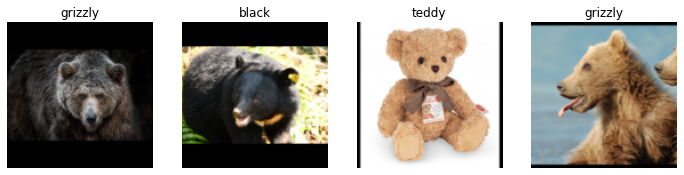

In [72]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

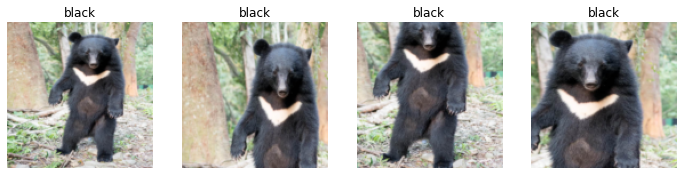

In [73]:


bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)



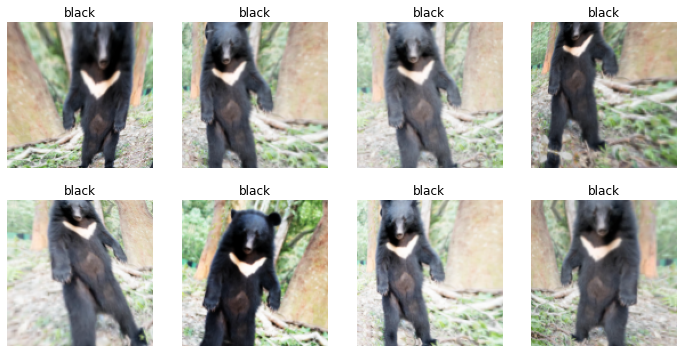

In [74]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [75]:


bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)



In [76]:


learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


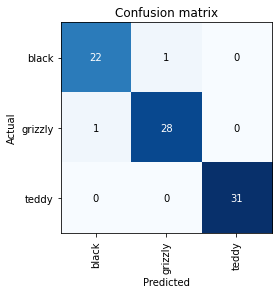

In [77]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

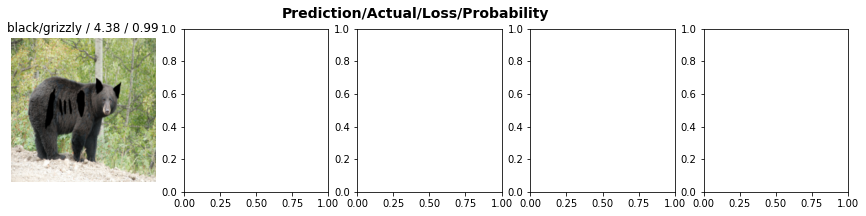

In [78]:
interp.plot_top_losses(5, nrows=1)

In [79]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [80]:


#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)



Error: ignored

In [81]:
learn.export()

In [83]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [84]:


learn_inf = load_learner(path/'export.pkl')



In [86]:
learn_inf.predict('images/1.jpg')

('black', TensorBase(0), TensorBase([9.9837e-01, 1.6320e-03, 1.6719e-06]))

In [87]:


learn_inf.dls.vocab



['black', 'grizzly', 'teddy']

In [88]:


#hide_output
btn_upload = widgets.FileUpload()
btn_upload



FileUpload(value={}, description='Upload')

In [96]:


#hide
# For the book, we can't actually click an upload button, so we fake it

img = PILImage.create('images/2.jpg')
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl


Output()

In [97]:
pred,pred_idx,probs = learn_inf.predict(img)

In [98]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [99]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [100]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [101]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [102]:


#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])



IndexError: ignored

In [103]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.7 MB 4.2 MB/s 
     |████████████████████████████████| 129 kB 45.4 MB/s 
     |████████████████████████████████| 395 kB 60.4 MB/s 
     |████████████████████████████████| 111 kB 63.5 MB/s 
     |████████████████████████████████| 557 kB 62.0 MB/s 
     |████████████████████████████████| 428 kB 70.1 MB/s 
     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 79 kB 6.1 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
